In [1]:
import os
import os.path as op
import sys

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd

#from bluemath_tk.wrappers.swash.swash_wrapper import SwashModelWrapper
#from IPython.display import HTML

from scripts.wrappers import SwashModelWrapper_ondas

from scripts.bathymetry import linear_profile
from scripts.plots import plot_case_config

## 01.Define Case Variables

#### Necessary Paths

In [2]:
templates_dir = '/workspaces/ONDAS_Swash/templates'
output_dir = '/workspaces/ONDAS_Swash/cases'

#### Hydrodynamic Forcing

In [3]:
Hs = 2.5
Tp = 10.0
Hs_L0 =  round((2 * np.pi * (Hs)) / (9.81 * (Tp ** 2)),4)  # Should be between 0.005 and 0.05
WL = 1.0

In [4]:
Hs_L0

0.016

#### Create Bathymetry

In [5]:
h0 = -12  # offshore depth (m)
Ltotal = 1000  # beach heigh (m)
m = 10 / 300  # profile slope
Wfore = 400  # flume length before fore toe (m)

x_profile, depth_array = linear_profile(h0=h0, Ltotal=Ltotal, Wconst=Wfore, slope=m)

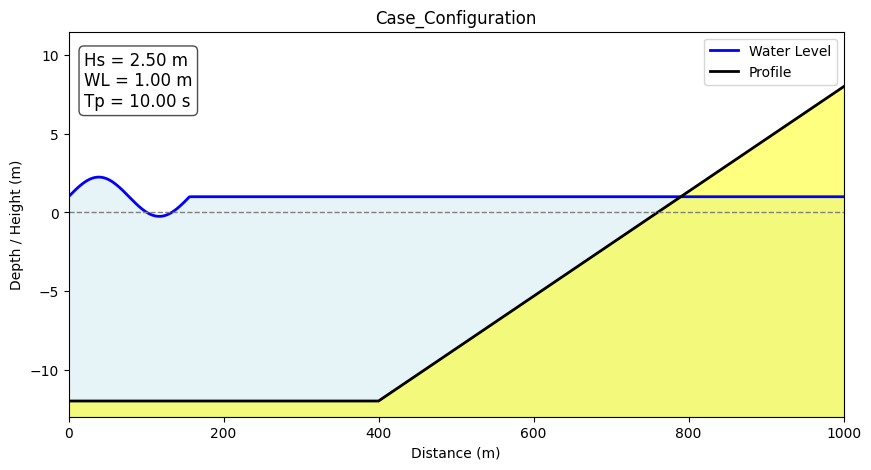

In [6]:
plot_case_config(x=x_profile, z=depth_array, wave_height=Hs, wave_period = Tp, WL=WL)

In [7]:
metamodel_parameters = pd.DataFrame({'Hs': Hs, 'Hs_L0': Hs_L0, 'WL': WL}, index=[0]).to_dict(orient='list')
fixed_parameters = {
    "dxinp": 1,  # bathymetry grid spacing  # Friction manning coefficient (m^-1/3 s)
    "comptime": 300,  # Simulation duration (s)
    "warmup": 300,  # Warmup duration (s)
    "n_nodes_per_wavelength": 60,  # number of nodes per wavelength
}

swash_model = SwashModelWrapper_ondas(
    templates_dir=templates_dir,
    metamodel_parameters=metamodel_parameters,
    fixed_parameters=fixed_parameters,
    output_dir=output_dir,
    depth_array=-depth_array,
)

In [8]:
swash_model.build_cases()

In [16]:
swash_model.run_cases(launcher='docker_serial')

2025-10-24 11:22:18,395 - SwashModelWrapper_ondas - ERROR - Error running command: docker run --rm -v .:/case_dir -w /case_dir geoocean/rocky8 swash_serial.exe
2025-10-24 11:22:18,395 - SwashModelWrapper_ondas - ERROR - Error: Command 'docker run --rm -v .:/case_dir -w /case_dir geoocean/rocky8 swash_serial.exe' returned non-zero exit status 127.


In [14]:
swash_model.list_available_launchers()

{'serial': 'swash_serial.exe',
 'mpi': 'mpirun -np 2 swash_mpi.exe',
 'docker_serial': 'docker run --rm -v .:/case_dir -w /case_dir geoocean/rocky8 swash_serial.exe',
 'docker_mpi': 'docker run --rm -v .:/case_dir -w /case_dir geoocean/rocky8 mpirun -np 2 swash_mpi.exe',
 'geoocean-cluster': 'launchSwash.sh'}